## Çoklu Doğrusal Regresyon ile Reklamların Satışa Etkisi

Elimizde farklı reklam kaynaklarına yapılan harcamalar ve satış mikrtarlarını gösteren bir veri seti var. Regresyon modeli oluşturarak hangi reklem kanalının satışlar üzerinde etkisinin daha fazla olduğunu belirleyeceğiz.

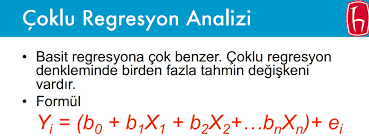

## Kütüphaneleri Yükle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Veri Dosyasını Yükle

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3073-49B7

 Directory of C:\Users\murat\Documents\ECO_Nov\ML

16.12.2024  22:24    <DIR>          .
16.12.2024  22:16    <DIR>          ..
16.12.2024  22:17    <DIR>          .ipynb_checkpoints
19.02.2024  21:11             4.063 advertising.csv
16.12.2024  22:24             1.367 €oklu Do§rusal Regresyon.ipynb
               2 File(s)          5.430 bytes
               3 Dir(s)   4.530.487.296 bytes free


In [3]:
df=pd.read_csv('advertising.csv')

## Veri ön işleme ve Veri Keşfi

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Amaç: regresyon formülündeki değerleri (katsayıları) bulmak.
Satış= Sabit+ katsayı1*Tv+ katsayı2*Radio+ katsayı3*Newspaper + Hata

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

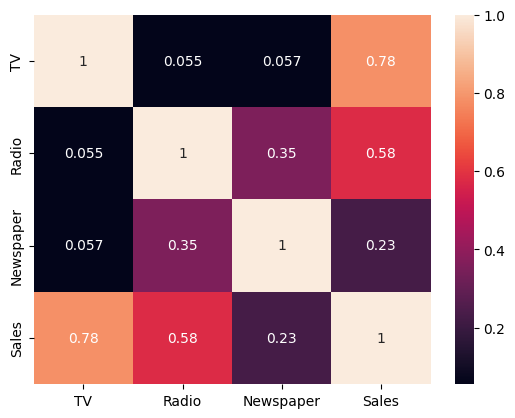

In [9]:
sns.heatmap(df.corr(), annot=True)

In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
#Diğer kütüphanelerin yüklenmesi
#veri setini eğitim ve test olarak bölmek için kullanılan modül
from sklearn.model_selection import train_test_split

#Ölçeklendirme yapmak için
from sklearn.preprocessing import StandardScaler as Scaler

#Lineer Regresyon modelini içe aktar
from sklearn.linear_model import LinearRegression

#Modeli değerlendirmek için kullanılan metrikler
from sklearn.metrics import mean_squared_error, r2_score

#### Özellikleri ve hedef sütunu belirle

In [11]:
X=df[['TV','Radio','Newspaper']] #X=df.drop('Sales',axis=1)
y=df['Sales']

#### Veri setinin bölünmesi

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=.2,
                                               random_state=42)

### Model Oluşturma

In [13]:
lr=LinearRegression()

#### Modelin Eğitimi

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

### Tahmin Yapma

In [15]:
y_predict=lr.predict(X_test)

In [16]:
y_predict

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [17]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [18]:
model_predict=pd.DataFrame({'Gerçek':y_test,'Tahmin':y_predict})
model_predict

,Gerçek,Tahmin
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


In [19]:
model_predict['Hata']=abs(model_predict['Gerçek']-model_predict['Tahmin'])
model_predict

,Gerçek,Tahmin,Hata
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,0.153843
158,7.3,10.608503,3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,2.106346
45,14.9,15.155070,0.255070


In [20]:
model_predict['Mape']=model_predict['Hata']/model_predict['Gerçek']
model_predict

,Gerçek,Tahmin,Hata,Mape
95,16.9,16.408024,0.491976,0.029111
15,22.4,20.889882,1.510118,0.067416
30,21.4,21.553843,0.153843,0.007189
158,7.3,10.608503,3.308503,0.453220
128,24.7,22.112373,2.587627,0.104762
115,12.6,13.105592,0.505592,0.040126
69,22.3,21.057192,1.242808,0.055731
170,8.4,7.461010,0.938990,0.111784
174,11.5,13.606346,2.106346,0.183161
45,14.9,15.155070,0.255070,0.017119


In [21]:
model_predict['Mape'].mean()

0.15198846602831226